<a href="https://colab.research.google.com/github/sinnara2021/AI/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 판다스를 이용하여 데이터 준비하기

사용할 데이터 
- 레모네이드: https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv
- 보스턴: https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv
- 아이리스: https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv


In [ ]:
import pandas as pd

# 데이터를 준비합니다. 
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"
lemon = pd.read_csv(path)
print(lemon.shape)

# 독립변수, 종속변수 분리해 내는 것.
x_input = lemon[['온도']]
y_label = lemon[['판매량']]
print(x_input.shape, y_label.shape)

y_label.head()

(6, 2)
(6, 1) (6, 1)


,판매량
0,40
1,42
2,44
3,46
4,48


### 실습.
1. 보스턴 x_input, y_label 만들기 (종속변수: 'medv')
1. 아이리스 x_input, y_label 만들기 (종속변수: '품종')

In [ ]:
# 데이터를 준비합니다. 
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)
print(boston.columns)
x_input = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
x_input.head()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


# 1. 레모네이드 판매예측

In [ ]:
import pandas as pd
# 데이터를 준비합니다. 

path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv'
data = pd.read_csv(path)

x = data[['온도']]
y = data[['판매량']]
print(x.shape, y.shape)

(6, 1) (6, 1)


In [ ]:
import tensorflow as tf

# 모델을 준비합니다. 
X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
# 모델을 학습시킵니다. 
model.fit(x, y, epochs=1000, verbose=0)
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 4ms/step - loss: 5.4988e-04
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 5.4949e-04
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 5.4929e-04
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 5.4905e-04
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 5.4877e-04
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 5.4854e-04
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 5.4817e-04
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 5.4778e-04
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 5.4738e-04
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 5.4696e-04


In [ ]:
# 모델을 이용합니다. 
model.predict(x)

array([[40.142704],
       [42.092808],
       [44.042915],
       [45.993023],
       [47.94313 ],
       [49.893238]], dtype=float32)

In [ ]:
model.get_weights()

[array([[1.9501071]], dtype=float32), array([1.1405617], dtype=float32)]

In [ ]:
# 판매량 = 1.9501071 * 온도 + 1.1405617
판매량 = 1.9501071 * 22 + 1.1405617
판매량

44.0429179

# 2. 보스턴 집값 예측

In [ ]:
import pandas as pd

# 데이터를 준비합니다. 
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
data = pd.read_csv(path)
print(data.shape)
data.columns

x = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = data[['medv']]
print(x.shape, y.shape)

(506, 14)
(506, 13) (506, 1)


In [ ]:
import tensorflow as tf
# 모델을 준비합니다. 

X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델을 학습합니다. 
model.fit(x, y, epochs=300, verbose=0)
model.fit(x, y, epochs=10)

In [ ]:
# 모델을 이용합니다. 
model.predict(x[-5:])

In [ ]:
y[-5:]

In [ ]:
model.get_weights()

[array([[-0.08932897],
        [ 0.06831625],
        [-0.05585582],
        [ 3.258068  ],
        [ 1.890527  ],
        [ 4.412778  ],
        [ 0.00682548],
        [-0.9420162 ],
        [ 0.15380481],
        [-0.0103006 ],
        [-0.09796963],
        [ 0.01550298],
        [-0.5451075 ]], dtype=float32), array([2.5463934], dtype=float32)]

In [ ]:
medv = -0.08932897 * x1 + 0.06831625 * x2 + ..... + -0.5451075 * x13 + 2.5463934

# 3. 아이리스 품종 분류

In [ ]:
import pandas as pd
# 데이터를 준비합니다. 

path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv'
data = pd.read_csv(path)
print(data.shape)
print(data.columns)
print(data.info())
onehot = pd.get_dummies(data)

x = onehot[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y = onehot[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(x.shape, y.shape)

In [ ]:
import tensorflow as tf

# 모델을 준비합니다. 
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation='softmax')(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

model.summary()

In [ ]:
# 모델을 학습시킵니다.
model.fit(x, y, epochs=100, verbose=0)
model.fit(x, y, epochs=10)

In [ ]:
x[-5:]

In [ ]:
# 모델을 이용합니다. 
model.predict(x[-5:])

array([[0.04194402, 0.27288052, 0.6851755 ],
       [0.05601064, 0.27681518, 0.6671742 ],
       [0.06692649, 0.3184982 , 0.61457527],
       [0.05338761, 0.30664125, 0.6399712 ],
       [0.09186772, 0.34706968, 0.5610626 ]], dtype=float32)

In [ ]:
y[-5:]

,품종_setosa,품종_versicolor,품종_virginica
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1
149,0,0,1


In [ ]:
model.get_weights()

[array([[ 1.4538002,  0.465575 , -1.0285187],
        [ 4.8266187,  1.2368513, -1.0901021],
        [-5.3839087, -0.2599829,  2.1557646],
        [-7.5328484, -2.4872448,  2.8319511]], dtype=float32),
 array([ 3.189764 ,  1.8772011, -2.695162 ], dtype=float32)]

# 4. 진짜 인공신경망

In [ ]:
import pandas as pd

# 데이터를 준비합니다. 
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
data = pd.read_csv(path)
print(data.shape)
data.columns

x = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = data[['medv']]
print(x.shape, y.shape)

(506, 14)
(506, 13) (506, 1)


In [ ]:
import tensorflow as tf
# 모델을 준비합니다. 

X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5, activation='swish')(X)
H = tf.keras.layers.Dense(3, activation='swish')(H)
H = tf.keras.layers.Dense(3, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

In [ ]:
# 모델을 학습합니다. 
model.fit(x, y, epochs=1000, verbose=0)
model.fit(x, y, epochs=10)

# 4. 텐서플로우의 이해

## 4.1 모델을 구성하는 여러가지 방법

1. Functional vs Sequential
2. parameter optimizer
3. activation layer 사용하는 것
4. layers, activations, optimzers, losses

In [ ]:
import pandas as pd

# 데이터를 준비합니다. 
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
data = pd.read_csv(path)
print(data.shape)
data.columns

x = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = data[['medv']]
print(x.shape, y.shape)

(506, 14)
(506, 13) (506, 1)


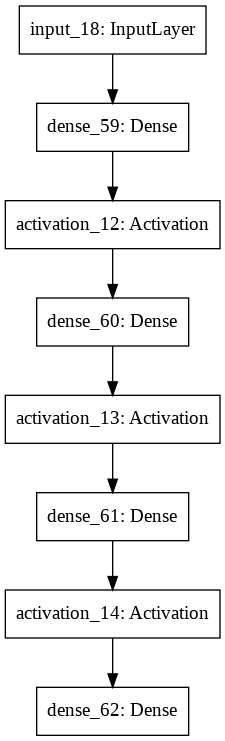

In [ ]:
import tensorflow as tf
# 모델을 준비합니다. 

# functional
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5)(X)
H = tf.keras.layers.Activation(tf.keras.activations.swish)(H)
H = tf.keras.layers.Dense(3)(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(3)(H)
H = tf.keras.layers.Activation('swish')(H)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X, Y)
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss=tf.keras.losses.mse)

tf.keras.utils.plot_model(model)

In [ ]:
model.fit(x, y, epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
4/4 [==============================] - 1s 3ms/step - loss: 2565.5720
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 1938.7932
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 1582.7911
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 1320.6766
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 1112.6003
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 941.3575
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 796.9983
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 674.5152
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 570.9585
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 483.9944


In [ ]:
import tensorflow as tf
# 모델을 준비합니다. 

# functional
X = tf.keras.layers.Input(shape=[13])
H1 = tf.keras.layers.Dense(5, activation='swish')(X)
H2 = tf.keras.layers.Dense(5, activation='swish')(X)
H3 = tf.keras.layers.Dense(5, activation='swish')(H2)
H4 = tf.keras.layers.Add()([H1, H3])
H = tf.keras.layers.Dense(3, activation='swish')(H4)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

tf.keras.utils.plot_model(model)

In [ ]:
# sequential
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Input(shape=[13]))
model_seq.add(tf.keras.layers.Dense(5, activation='swish'))
model_seq.add(tf.keras.layers.Dense(3, activation='swish'))
model_seq.add(tf.keras.layers.Dense(3, activation='swish'))
model_seq.add(tf.keras.layers.Dense(1))
model_seq.compile(loss='mse')

tf.keras.utils.plot_model(model_seq)

In [ ]:
model_seq.fit(x, y, epochs=100)

## 4.2 Train / Test / Validaion
- Train: 학습
- Test: 수능시험
- Validation: 모의고사

In [ ]:
import pandas as pd

# 데이터를 준비합니다. 
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
data = pd.read_csv(path)
print(data.shape)
data.columns

num = int(506 * 0.7)
print(num)

train, test = data[:num], data[num:]
print(train.shape, test.shape)

(506, 14)
354
(354, 14) (152, 14)


In [ ]:
x_train = train[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y_train = train[['medv']]
print(x_train.shape, y_train.shape)

x_test = test[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y_test = test[['medv']]
print(x_test.shape, y_test.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


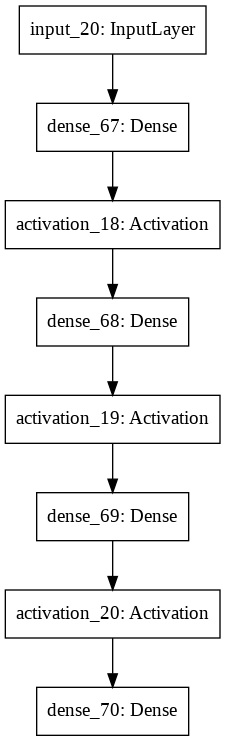

In [ ]:
import tensorflow as tf
# 모델을 준비합니다. 

# functional
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5)(X)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(3)(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(3)(H)
H = tf.keras.layers.Activation('swish')(H)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X, Y)
model.compile(optimizer='rmsprop', loss='mse')

tf.keras.utils.plot_model(model)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 0s 43ms/step - loss: 13.6148 - val_loss: 16.0119
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 13.5352 - val_loss: 16.5780
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - loss: 12.8353 - val_loss: 18.7657
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 12.9440 - val_loss: 14.3190
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 13.4970 - val_loss: 15.6758
Epoch 6/10
3/3 [==============================] - 0s 12ms/step - loss: 12.9155 - val_loss: 15.4301
Epoch 7/10
3/3 [==============================] - 0s 12ms/step - loss: 13.1818 - val_loss: 14.4433
Epoch 8/10
3/3 [==============================] - 0s 14ms/step - loss: 13.5784 - val_loss: 17.7783
Epoch 9/10
3/3 [==============================] - 0s 12ms/step - loss: 12.7510 - val_loss: 16.5121
Epoch 10/10
3/3 [==============================] - 0s 11ms/step - loss: 12.7778 - val_loss: 16.0351


In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 2239.2683


2239.268310546875

- train loss: 12.7778
- val loss: 16.0351
- test loss: 2239.2683


## 4.2 mnist

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


3


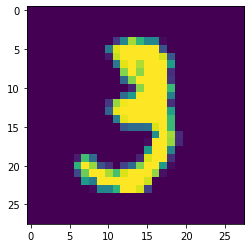

In [ ]:
import matplotlib.pyplot as plt

print(y_train[10])
plt.imshow(x_train[10])

In [ ]:
# 6000장의 이미지를 칼럼이 784개인 표로 옮기기
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [ ]:
# 종속변수를 원핫인코딩
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
y_train.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [ ]:
# model 만들기 

X = tf.keras.layers.Input(shape=[784])

H = tf.keras.layers.Dense(128)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation_24 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_25 (Activation)   (None, 128)               0  

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 0.2369 - accuracy: 0.9314 - val_loss: 0.1368 - val_accuracy: 0.9588
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0898 - accuracy: 0.9719 - val_loss: 0.1107 - val_accuracy: 0.9661
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0615 - accuracy: 0.9810 - val_loss: 0.0990 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.1156 - val_accuracy: 0.9668
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0982 - val_accuracy: 0.9735
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0926 - val_accuracy: 0.9762
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.1043 - val_accuracy: 0.9728
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9784


[0.08947279304265976, 0.9783999919891357]

## 복습. 딥러닝

In [ ]:
# 데이터 준비하기
x_input = [
    [1, 2],
    [1, 5],
    [2, 2],
    [2, 9],
    [3, 1],
    [3, 7],
    [4, 3],
    [4, 8],
    [5, 8],
    [5, 3],
    [6, 5],
    [6, 9],
    [7, 3],
    [7, 1],
    [8, 5],
    [8, 8],
    [9, 4],
    [9, 3],
]
y_label = [[sum(e), e[0] - e[1]] for e in x_input]
y_label

[[3, -1],
 [6, -4],
 [4, 0],
 [11, -7],
 [4, 2],
 [10, -4],
 [7, 1],
 [12, -4],
 [13, -3],
 [8, 2],
 [11, 1],
 [15, -3],
 [10, 4],
 [8, 6],
 [13, 3],
 [16, 0],
 [13, 5],
 [12, 6]]

In [ ]:
import tensorflow as tf

# 모델을 준비하기

X = tf.keras.layers.Input(shape=[2])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(2)(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(x_input, y_label, epochs=1000, verbose=0)
model.fit(x_input, y_label, epochs=10)

In [ ]:
print(y_label)
model.predict(x_input)

In [ ]:
model.predict([[6, 2]])

array([[8.048775 , 4.2235975]], dtype=float32)

In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf

dataset = pd.read_csv("https://raw.githubusercontent.com/blackdew/DeepLearningZeroToAll/master/data-02-stock_daily.csv", skiprows=1)
print(dataset.shape)
dataset.head()

In [ ]:
dataset = dataset.values[::-1]
data_norm = (dataset - dataset.min(axis=0)) / (dataset.max(axis=0) - dataset.min(axis=0))
print(data_norm.shape)

x_data = np.array([data_norm[i : i + 7, :] for i in range(len(data_norm) - 7)])
y_data = np.array([data_norm[i + 7, [-1]] for i in range(len(data_norm) - 7)])

print(x_data.shape, y_data.shape)

x_test, x_train = x_data[505:], x_data[:505]
y_test, y_train = y_data[505:], y_data[:505]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
X = tf.keras.layers.Input(shape=[7, 5])
H = tf.keras.layers.LSTM(32)(X)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X, Y)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=500, verbose=0)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 6ms/step - loss: 5.6124e-04
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 5.5281e-04
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 5.5766e-04
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 5.8137e-04
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 5.5794e-04
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 5.5983e-04
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 5.4396e-04
Epoch 8/10
16/16 [==============================] - 0s 5ms/step - loss: 5.4730e-04
Epoch 9/10
16/16 [==============================] - 0s 6ms/step - loss: 5.6769e-04
Epoch 10/10
16/16 [==============================] - 0s 5ms/step - loss: 5.4930e-04


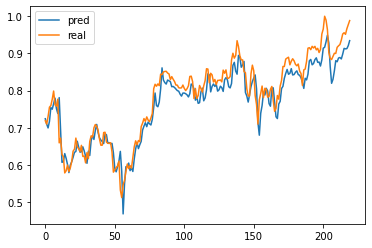

In [ ]:
pred = model.predict(x_test)

import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test)
plt.legend(['pred', 'real'])
plt.show()
